# Neural ERGM Notebook

## Imports

In [ ]:
import os, collections
import numpy as np
import seaborn as sns
import networkx as nx
import pandas as pd
from scipy import spatial

from utils.embeddings import *
from utils.mcmc import *
from utils.spectral import *
from utils.create_graphs import *

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

## Train the Embeddings and the Neural ERGM

In [ ]:
## hyper-parameters
dim = 60
MLE_lr = 0.5
M = 200
m = 500
train_epochs = 30
inference_epochs = 30
wl_iter = 2
KIFD = 2.0


## create the training data
Graphs_train = [] 
Graphs_test = [] 
Ngraphs = 100
Nnodes = 100
for i in range(Ngraphs):
    Graphs_train.append(nx.newman_watts_strogatz_graph(n=Nnodes, k=2, p=0.2))
    

## train the embeddings
dergm = DERGM(dim, Graph2Vec, wl_iter, train_epochs, dbow_words=0, window=0)
dergm.g2vfit(Graphs_train)

acceptance ratio for additions: 0.88
acceptance ratio for deletions: 0.58
t = 0, V = -8.65e-02
acceptance ratio for additions: 0.82
acceptance ratio for deletions: 0.61
t = 1, V = -1.28e-01
acceptance ratio for additions: 0.84
acceptance ratio for deletions: 0.62
t = 2, V = -1.74e-01
acceptance ratio for additions: 0.80
acceptance ratio for deletions: 0.67
t = 3, V = -1.87e-01
acceptance ratio for additions: 0.86
acceptance ratio for deletions: 0.69
t = 4, V = -2.10e-01
acceptance ratio for additions: 0.78
acceptance ratio for deletions: 0.65
t = 5, V = -2.26e-01
acceptance ratio for additions: 0.76
acceptance ratio for deletions: 0.66
t = 6, V = -2.35e-01
acceptance ratio for additions: 0.77
acceptance ratio for deletions: 0.71
t = 7, V = -2.38e-01
acceptance ratio for additions: 0.75
acceptance ratio for deletions: 0.68
t = 8, V = -2.44e-01
acceptance ratio for additions: 0.77
acceptance ratio for deletions: 0.73
t = 9, V = -2.45e-01
acceptance ratio for additions: 0.70
acceptance ra

acceptance ratio for additions: 0.17
acceptance ratio for deletions: 0.13
t = 86, V = -6.16e-01
acceptance ratio for additions: 0.13
acceptance ratio for deletions: 0.03
t = 87, V = -1.35e+00
acceptance ratio for additions: 0.05
acceptance ratio for deletions: 0.07
t = 88, V = -1.30e+00
acceptance ratio for additions: 0.07
acceptance ratio for deletions: 0.10
t = 89, V = -1.22e+00
acceptance ratio for additions: 0.10
acceptance ratio for deletions: 0.27
t = 90, V = -8.10e-01
acceptance ratio for additions: 0.10
acceptance ratio for deletions: 0.24
t = 91, V = -4.90e-01
acceptance ratio for additions: 0.06
acceptance ratio for deletions: 0.18
t = 92, V = 1.00e-02
acceptance ratio for additions: 0.14
acceptance ratio for deletions: 0.13
t = 93, V = 8.45e-03
acceptance ratio for additions: 0.13
acceptance ratio for deletions: 0.10
t = 94, V = -7.04e-03
acceptance ratio for additions: 0.17
acceptance ratio for deletions: 0.16
t = 95, V = -1.09e-02
acceptance ratio for additions: 0.16
accep

acceptance ratio for additions: 0.17
acceptance ratio for deletions: 0.08
t = 171, V = -7.09e-01
acceptance ratio for additions: 0.15
acceptance ratio for deletions: 0.23
t = 172, V = -6.39e-01
acceptance ratio for additions: 0.10
acceptance ratio for deletions: 0.18
t = 173, V = -4.91e-01
acceptance ratio for additions: 0.13
acceptance ratio for deletions: 0.07
t = 174, V = -7.01e-01
acceptance ratio for additions: 0.07
acceptance ratio for deletions: 0.08
t = 175, V = -6.91e-01
acceptance ratio for additions: 0.03
acceptance ratio for deletions: 0.16
t = 176, V = 2.22e-01
acceptance ratio for additions: 0.07
acceptance ratio for deletions: 0.06
t = 177, V = 2.11e-01
acceptance ratio for additions: 0.25
acceptance ratio for deletions: 0.12
t = 178, V = -2.03e-02
acceptance ratio for additions: 0.14
acceptance ratio for deletions: 0.10
t = 179, V = -6.89e-02
acceptance ratio for additions: 0.16
acceptance ratio for deletions: 0.12
t = 180, V = -9.97e-02
acceptance ratio for additions: 

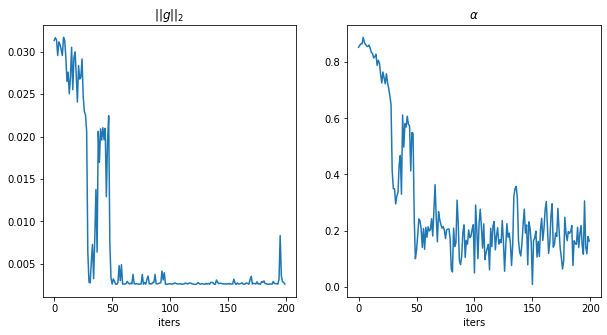

In [3]:
## initialize the ERGM parameters 
fdata = dergm.g2vModel.get_embedding()
fdata_avg = np.mean(fdata, axis=0)
dergm.theta = 5*np.random.normal(np.mean(fdata_avg), np.sqrt(dim)*np.sqrt(np.var(fdata_avg)), dim)
theta_init = dergm.theta.copy()

## use hand-crafted feature function
#def feature_func(G, inference_epochs=None):
#dergm.feature_func = self.g2vModel.infer_vector

grad_list, accept_list, Graphs_sim_train = dergm.train([Graphs_train[0]], MLE_lr, M, m, inference_epochs, KIFD)

## plot the training metrics
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(grad_list)
#ax1.set_yscale('log')
ax1.set_title(r'$||g||_2$')
ax1.set_xlabel('iters')
    
ax2.plot(accept_list)
#ax2.set_yscale('log')
ax2.set_title(r'$\alpha$')
ax2.set_xlabel('iters')

plt.show()

Inspect the sampled graphs throughout training

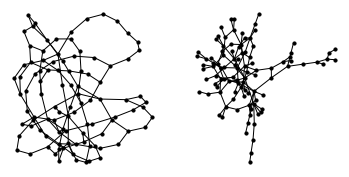

In [4]:
fig, axarr = plt.subplots(1, 2, figsize=(2*3,1*3))

nx.draw(Graphs_sim_train[0], node_color='k', node_size=10, with_labels=False, ax=axarr[0])
nx.draw(Graphs_sim_train[-1], node_color='k', node_size=10, with_labels=False, ax=axarr[1])

plt.show()

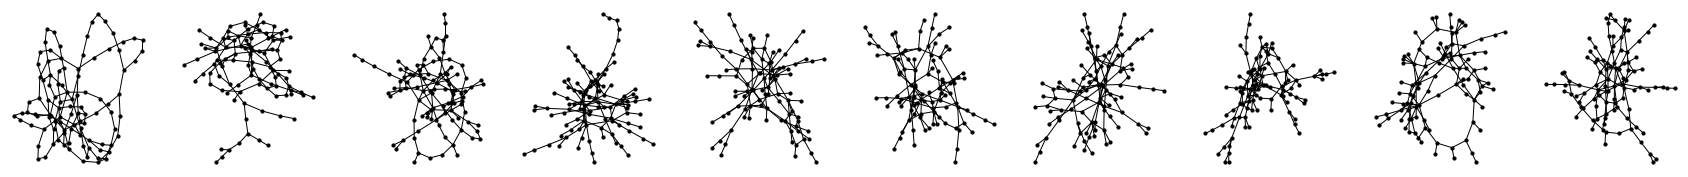

In [5]:
fig, axarr = plt.subplots(1, 10, figsize=(10*3,1*3))

for i in range(10):
    nx.draw(Graphs_sim_train[int(M/10.0)*i], node_color='k', node_size=10, with_labels=False, ax=axarr[i])

plt.show()

Evaluate the density throughout training

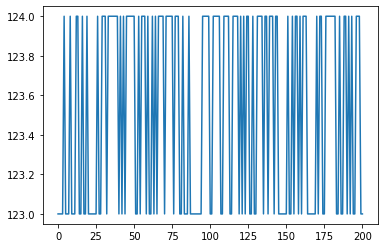

In [7]:
plt.plot([nx.number_of_edges(Graphs_sim_train[i]) for i in range(len(Graphs_sim_train))])
plt.show()

Investigate how the number of connected components changes with training

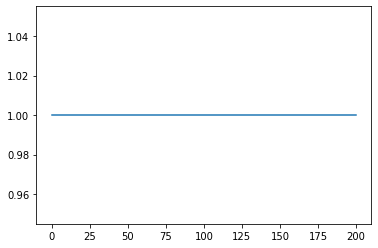

In [8]:
plt.plot([nx.number_connected_components(Graphs_sim_train[i]) for i in range(len(Graphs_sim_train))])
plt.show()

In [9]:
Graph_null = nx.erdos_renyi_graph(Graphs_train[0].number_of_nodes(), nx.density(Graphs_train[0]))

m = 10000
G_MCMC, f_list, accept_ratios, isDelete, dfAdd, dfDel, V \
    = sampler(Graphs_train[0], dergm.theta, dergm.feature_func, dim, m, inference_epochs, False, 0)

acceptance ratio for additions: 0.17
acceptance ratio for deletions: 0.14


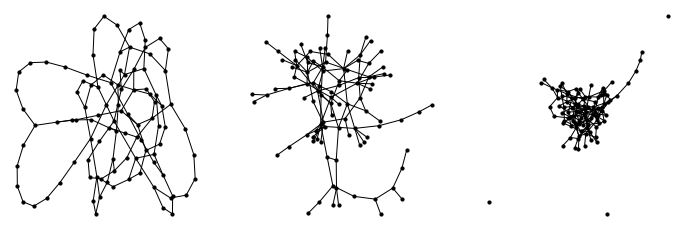

In [10]:
fig, axarr = plt.subplots(1, 3, figsize=(3*4,1*4))
nx.draw(Graphs_train[0], node_color='k', node_size=10, with_labels=False, ax=axarr[0])
nx.draw(Graphs_sim_train[-1], node_color='k', node_size=10, with_labels=False, ax=axarr[1])    
nx.draw(Graph_null, node_color='k', node_size=10, with_labels=False, ax=axarr[2])    
plt.show()

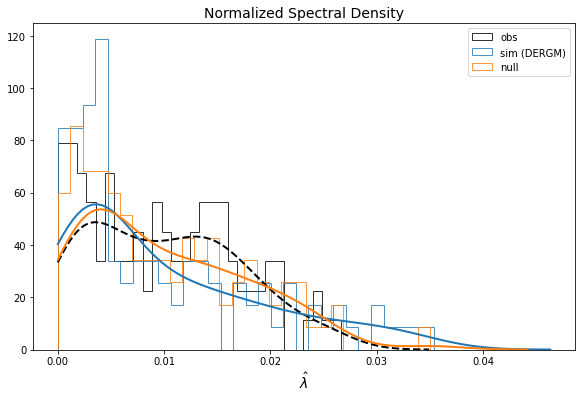

In [11]:
## compare the eigenvalue distribution for a single one of: (observed, simulated, null) graphs
nbins = 30
alpha = 0.8
golden_ratio = 1.61803398875

plt.figure(figsize=(golden_ratio*6,6))
#ax = sns.barplot(x="Word", y="Frequency", data=boxdata)

sns.distplot(Laplacian_eigs(Graphs_train[0]), 
             hist_kws={"alpha":alpha, "histtype":u'step'}, 
             bins=nbins, 
             label='obs', 
             kde_kws={'clip': (0.0, 1.0), "linewidth":2, "linestyle":"dashed"}, color='k')
sns.distplot(Laplacian_eigs(Graphs_sim_train[-1]), 
             hist_kws={"alpha":alpha, "histtype":u'step'}, 
             bins=nbins, 
             label='sim (DERGM)', 
             kde_kws={'clip': (0.0, 1.0), "linewidth":2})
sns.distplot(Laplacian_eigs(Graph_null), 
             hist_kws={"alpha":alpha, "histtype":u'step'}, 
             bins=nbins, 
             label='null', 
             kde_kws={'clip': (0.0, 1.0), "linewidth":2})

plt.title('Normalized Spectral Density', fontsize=14)
plt.legend()
plt.xlabel(r'$\hat{\lambda}$', fontsize=14)
plt.show()

Look at the distribution of the first 16 feature vector components for the Markov chain

In [12]:
f_list.shape

(10001, 60)

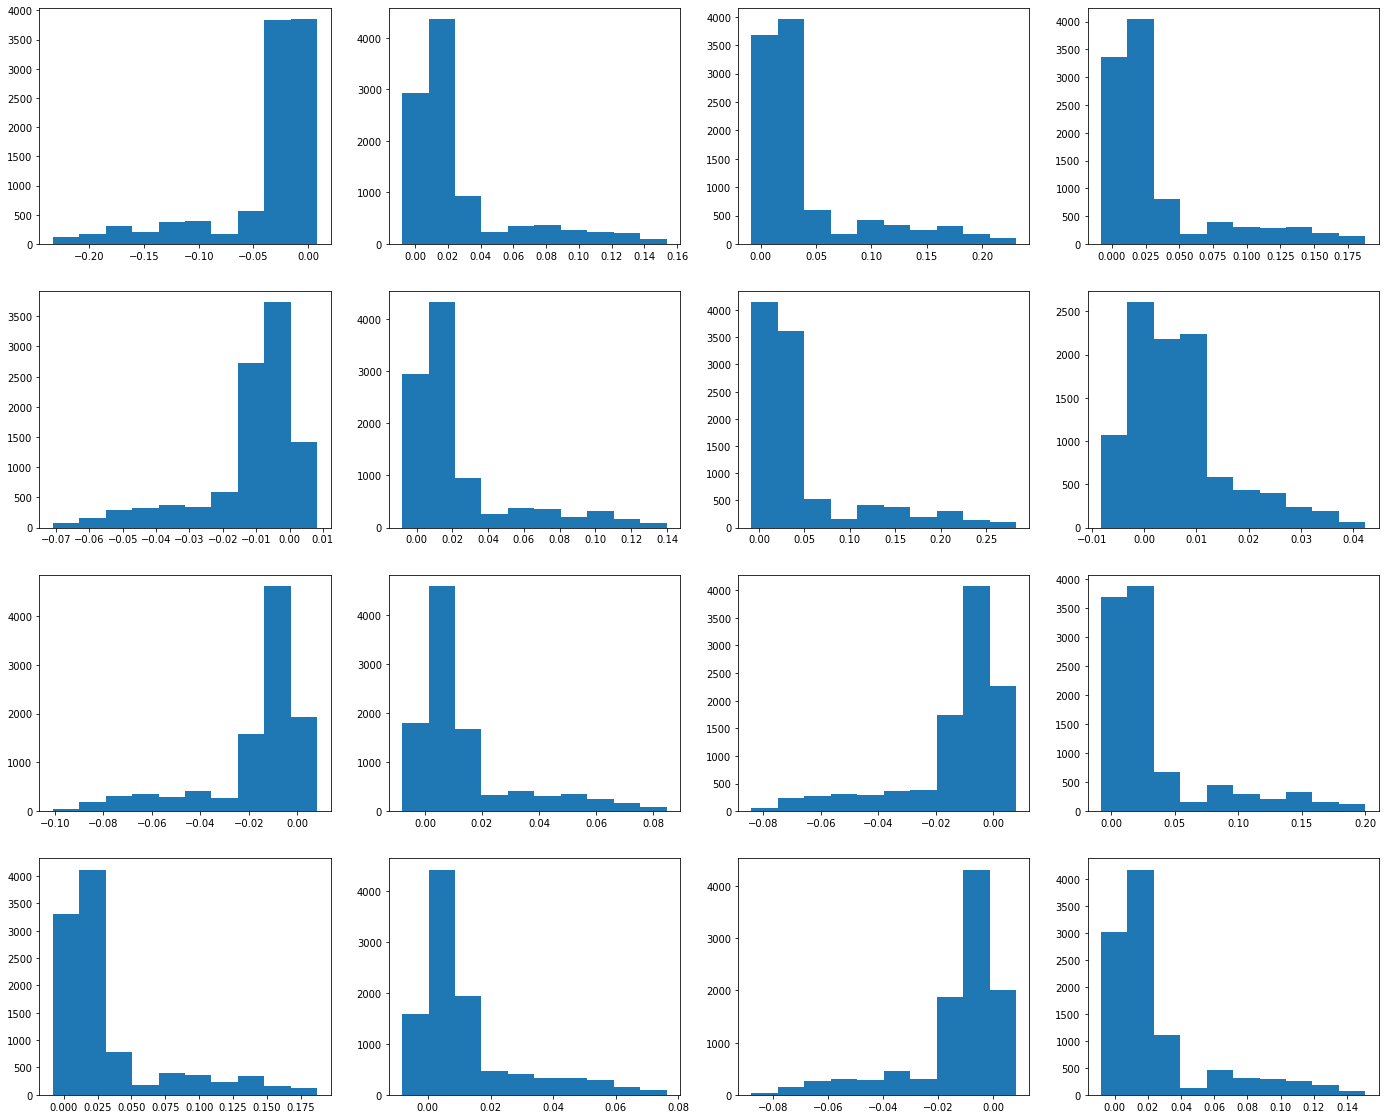

In [13]:
fig, axarr = plt.subplots(4, 4, figsize=(4*6,4*5))
i_f = 0
for i1 in range(4):
    for i2 in range(4):
        axarr[i1, i2].hist(f_list[:,i_f], bins=10)
        #axarr[i1, i2].axvline(x=favg_data[i_f], color='k')
        i_f += 1
plt.show()

Generate and save a number of graphs

In [14]:
m = 100000

graph_type = 'small_world'
save_path = 'graphs/generated/' + graph_type + '/'
if not os.path.exists(save_path):
    os.makedirs(save_path)

Graphs_sim = []
for i in range(10): #len(Graphs_test)
    print('simulating graph %i/%i' %(i+1,10)) 
    ## for the reference graph, use an ER with the same density as in the training set
    #Nnodes = Graphs_train[i].number_of_nodes()
    #Nedges = Graphs_train[i].number_of_edges()
    #p = Nedges/(Nnodes*(Nnodes-1)/2)
    #Gstart = nx.erdos_renyi_graph(Nnodes, p)

    ## use a 1:1 correspondence for the sampled and test graphs
    G, f_list, accept_ratios, isDelete, dfAdd, dfDel, V \
        = sampler(Graphs_train[i], dergm.theta, dergm.feature_func, dim, m, inference_epochs, False, 0)    
    nx.write_edgelist(G, save_path + str(i) + '.gz')
    Graphs_sim.append(G)

simulating graph 1/10
acceptance ratio for additions: 0.16
acceptance ratio for deletions: 0.10
simulating graph 2/10
acceptance ratio for additions: 0.13
acceptance ratio for deletions: 0.08
simulating graph 3/10
acceptance ratio for additions: 0.17
acceptance ratio for deletions: 0.12
simulating graph 4/10
acceptance ratio for additions: 0.15
acceptance ratio for deletions: 0.10
simulating graph 5/10
acceptance ratio for additions: 0.12
acceptance ratio for deletions: 0.08
simulating graph 6/10
acceptance ratio for additions: 0.12
acceptance ratio for deletions: 0.08
simulating graph 7/10
acceptance ratio for additions: 0.18
acceptance ratio for deletions: 0.12
simulating graph 8/10
acceptance ratio for additions: 0.14
acceptance ratio for deletions: 0.10
simulating graph 9/10
acceptance ratio for additions: 0.15
acceptance ratio for deletions: 0.10
simulating graph 10/10
acceptance ratio for additions: 0.11
acceptance ratio for deletions: 0.06


## OLD

In [ ]:
graph_type = 'barabasi'

load the graphs

options are: (community, X, Y, Z)

In [ ]:
Graphs = create(graph_type)

print('Number of graphs = %i' %len(Graphs))
plt.hist([Graphs[i].number_of_nodes() for i in range(len(Graphs))], bins=20)
plt.xlabel('Graph size (|V|)')
plt.show()

display a few examples

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(16,4))
for i in range(4):
    graph_num = [0, 20, 50, 80][i]
    #pos = dict( (n, n) for n in Graphs[graph_num].nodes() )
    nx.draw(Graphs[graph_num], node_color='k', node_size=10, with_labels=False, ax=ax[i])
plt.show()

test and train split

In [ ]:
Ntrain = int(0.8*len(Graphs))
Graphs_train = Graphs[0:Ntrain]
Graphs_test = Graphs[Ntrain:]
print('Train size = %i, Test size = %i' %(len(Graphs_train), len(Graphs_test)))

## save the graphs
save_path = 'graphs/data/' + graph_type + '/train/'
if not os.path.exists(save_path):
    os.makedirs(save_path)    
for i in range(len(Graphs_train)):
    nx.write_edgelist(Graphs_train[i], save_path + str(i) + '.gz')    

save_path = 'graphs/data/' + graph_type + '/test/'
if not os.path.exists(save_path):
    os.makedirs(save_path)    
for i in range(len(Graphs_test)):
    nx.write_edgelist(Graphs_test[i], save_path + str(i) + '.gz')

# Neural ERGM

Train the embeddings

In [ ]:
dim = 10

dergm = DERGM(dim, Graph2Vec, 2, basic_sampler) #GL2Vec, IDF_sampler
dergm.g2vfit(Graphs_train)

In [ ]:
def feature_func_density(G, epochs=None):
    return np.array([nx.density(G)])
    
#dergm.feature_func = feature_func_density

compute the average feature vector on the training set

In [ ]:
f0 = dergm.g2vModel.get_embedding()
f0avg = np.mean(f0, axis=0)

In [ ]:
Nnodes = Graphs_test[i].number_of_nodes()
Nedges = Graphs_test[i].number_of_edges()
p = Nedges/(Nnodes*(Nnodes-1)/2)
Gstart = nx.erdos_renyi_graph(Nnodes, p)

G, dfAdd, dfDel, alpha_list = IDF_sampler(Gstart, np.random.normal(0,1,4), dergm.feature_func, m=1000, epochs=1000)
#G, dfAdd, dfDel, alpha_list = IDF_sampler(Gstart, np.random.normal(0,1,1), feature_func_tmp, m=1000, epochs=1000)

In [ ]:
df_MCMC = dfAdd - dfDel
df_dergm = dergm.feature_func(G, epochs=1000) - dergm.feature_func(Gstart, epochs=1000)

In [ ]:
np.mean(np.abs((df_MCMC - df_dergm)/df_dergm))

In [ ]:
epochs = 1000#16
M_outer = 5
M_inner = 50
m = 1000

f0avg = dergm.feature_func(Graphs_train[0])

dergm.train_EE_init(basic_sampler, Graphs_train[0], M=5, m=50, epochs=epochs)
dtheta_l2_list, df_list, accept_ratio_list \
    = dergm.train_EE(Graphs_train[0], f0avg, \
                                M_outer=M_outer, M_inner=M_inner, m=m, epochs=epochs, verbose=True)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(dtheta_l2_list)
ax1.set_yscale('log')
ax1.set_title(r'$\ell_2$ norm of $\Delta \theta$')
ax1.set_xlabel('iters')
for i in range(M_outer):
    ax1.axvline(x=i*M_inner, color='k', linewidth=1, linestyle='--')
    
ax2.plot(df_list)
ax2.set_yscale('log')
ax2.set_title(r'$df$')
ax2.set_xlabel('iters')
for i in range(M_outer):
    ax2.axvline(x=i*M_inner, color='k', linewidth=1, linestyle='--')

plt.show()

sample the trained ERGM

In [ ]:
#save_path = 'graphs/generated/' + graph_type + '/'
#if not os.path.exists(save_path):
#    os.makedirs(save_path)

Graphs_sim = []
for i in range(1): #len(Graphs_test)
    ## for the reference graph, use an ER with the same density as in the training set
    Nnodes = Graphs_train[i].number_of_nodes()
    Nedges = Graphs_train[i].number_of_edges()
    p = Nedges/(Nnodes*(Nnodes-1)/2)
    Gstart = nx.erdos_renyi_graph(Nnodes, p)

    Gstart = Graphs_train[i]
    ## use a 1:1 correspondence for the sampled and test graphs
    G, alpha_list = dergm.sample(Gstart, m=10000, epochs=1000)
    #nx.write_edgelist(G, save_path + str(i) + '.gz')
    Graphs_sim.append(G)

print('mean acceptance ratio = %.3f' % np.mean(alpha_list))
plt.hist(alpha_list, bins=20)
plt.xlabel(r'$\alpha$')
plt.show()

visualize a few examples

In [ ]:
Graphs_train[0].number_of_edges()

In [ ]:
Graphs_sim[0].number_of_edges()

In [ ]:
fig = plt.figure(figsize=(12,4))

plt.subplot(131)
plt.title('observed')
#pos = dict( (n, n) for n in Graphs_train[0].nodes() )
nx.draw(Graphs_train[0], node_color='k', node_size=10, with_labels=False)

plt.subplot(132)
plt.title('DERGM')
#pos = dict( (n, n) for n in Graphs_sim[0].nodes() )
nx.draw(Graphs_sim[0], node_color='k', node_size=10, with_labels=False)

plt.show()